# 1. Import and Install Dependencies

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


c:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [31]:
import cv2
import mediapipe as mp
import os

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def mediapipe_detection(image, model):
    if image is None:
        print("Warning: 'image' is None in mediapipe_detection.")
        return None, None
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Make detections
    results = model.process(image_rgb)
    return image, results

def draw_landmarks(image, results):
    if image is None:
        print("Warning: 'image' is None in draw_landmarks.")
        return
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Path to your video file
video_path = 'above_40860_1.mp4'

# Check if the video file exists
if not os.path.exists(video_path):
    print(f"Error: Video file '{video_path}' not found.")
    exit()

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print(f"Error: Cannot open video file '{video_path}'.")
    exit()

# Set up the MediaPipe Holistic model
with mp_holistic.Holistic(
    min_detection_confidence=0.5, 
    min_tracking_confidence=0.5
) as holistic:
    while cap.isOpened():
        # Read a frame from the video
        ret, frame = cap.read()
        if not ret:
            print("End of video file reached or can't receive frame.")
            break

        # Debugging statement
        print(f"Frame received: {ret}, Frame type: {type(frame)}")

        # Make detections using MediaPipe
        image, results = mediapipe_detection(frame, holistic)
        if image is None or results is None:
            print("No results returned from mediapipe_detection.")
            continue

        # Draw landmarks on the image
        draw_landmarks(image, results)

        # Display the resulting image
        cv2.imshow('MediaPipe Feed', image)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            print("Video processing interrupted by user.")
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()
    print("Video processing completed.")



Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received: True, Frame type: <class 'numpy.ndarray'>
Frame received

In [34]:
draw_landmarks(image, results)

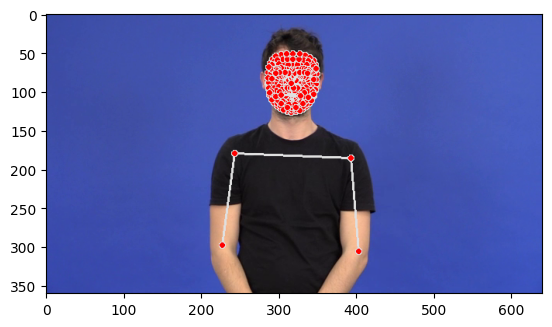

In [36]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [12]:
result_test

array([ 0.49380249,  0.25088552, -0.68979752, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [12]:
DATA_PATH = 'Descriptors_Adjectives'  # Path to your videos
actions = np.array(os.listdir(DATA_PATH))  # Assuming each action has its own folder


In [14]:
DATA_PATH1 = 'Feelings_Emotions_Questions'  # Path to your videos
actions1 = np.array(os.listdir(DATA_PATH1))  # Assuming each action has its own folder


In [15]:
DATA_PATH2 = 'Nouns'  # Path to your videos
actions2 = np.array(os.listdir(DATA_PATH2))  # Assuming each action has its own folder


In [14]:
np.delete(actions, -1)

array(['above', 'before', 'before_that', 'far', 'from', 'front', 'inside',
       'now', 'outside'], dtype='<U23')

In [8]:
########################################### Use this section when doing live recording and not having folders for each action ############################################
# Ensure the DATA_PATH exists
# if not os.path.exists(DATA_PATH):
#     os.makedirs(DATA_PATH)

# for action in actions: 
#     action_path = os.path.join(DATA_PATH, action)
    
#     # Ensure the action directory exists
#     if not os.path.exists(action_path):
#         os.makedirs(action_path)
#         dirmax = 0  # No directories yet, so start from 0
#     else:
#         existing_dirs = os.listdir(action_path)
#         if existing_dirs:
#             dirmax = np.max(np.array(existing_dirs).astype(int))
#         else:
#             dirmax = 0

#     for sequence in range(1, no_sequences + 1):
#         try: 
#             os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
#         except Exception as e:
#             print(f"Error creating directory: {e}")
#             pass


# 5. Collect Keypoint Values for Training and Testing

In [13]:
mp_holistic = mp.solutions.holistic
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        videos = os.listdir(action_path)
        for video_name in videos:
            video_path = os.path.join(action_path, video_name)
            cap = cv2.VideoCapture(video_path)
            frame_num = 0  # Initialize frame counter

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break  # Break if no frame is returned

                # Process frame with MediaPipe
                image, results = mediapipe_detection(frame, holistic)
                
                # Extract keypoints
                keypoints = extract_keypoints(results)

                # Save keypoints
                npy_name = f"{os.path.splitext(video_name)[0]}_frame{frame_num}.npy"
                npy_path = os.path.join(action_path, npy_name)
                np.save(npy_path, keypoints)

                frame_num += 1  # Increment frame counter

            cap.release()

c:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [16]:
mp_holistic = mp.solutions.holistic
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions1:
        action_path = os.path.join(DATA_PATH1, action)
        videos = os.listdir(action_path)
        for video_name in videos:
            video_path = os.path.join(action_path, video_name)
            cap = cv2.VideoCapture(video_path)
            frame_num = 0  # Initialize frame counter

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break  # Break if no frame is returned

                # Process frame with MediaPipe
                image, results = mediapipe_detection(frame, holistic)
                
                # Extract keypoints
                keypoints = extract_keypoints(results)

                # Save keypoints
                npy_name = f"{os.path.splitext(video_name)[0]}_frame{frame_num}.npy"
                npy_path = os.path.join(action_path, npy_name)
                np.save(npy_path, keypoints)

                frame_num += 1  # Increment frame counter

            cap.release()

c:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [17]:
mp_holistic = mp.solutions.holistic
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions2:
        action_path = os.path.join(DATA_PATH2, action)
        videos = os.listdir(action_path)
        for video_name in videos:
            video_path = os.path.join(action_path, video_name)
            cap = cv2.VideoCapture(video_path)
            frame_num = 0  # Initialize frame counter

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break  # Break if no frame is returned

                # Process frame with MediaPipe
                image, results = mediapipe_detection(frame, holistic)
                
                # Extract keypoints
                keypoints = extract_keypoints(results)

                # Save keypoints
                npy_name = f"{os.path.splitext(video_name)[0]}_frame{frame_num}.npy"
                npy_path = os.path.join(action_path, npy_name)
                np.save(npy_path, keypoints)

                frame_num += 1  # Increment frame counter

            cap.release()

In [38]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [18]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [76]:
label_map = {label:num for num, label in enumerate(actions2)}

In [77]:
label_map

{'beer': 0,
 'breasts': 1,
 'cat': 2,
 'competition': 3,
 'email': 4,
 'fruit': 5,
 'game': 6,
 'instruction': 7,
 'rubbish(nonsense)': 8,
 'rubbish(waste)': 9,
 'rubbish_bin': 10,
 'score': 11,
 'sister': 12,
 'skill': 13,
 'survey': 14,
 'theatre': 15,
 'water': 16,
 'zipper': 17}

In [79]:
sequences, labels = [], []
label_map = {label: num for num, label in enumerate(actions2)}
sequence_length = 60 # Define your desired sequence length

for action in actions2:
    action_path = os.path.join(DATA_PATH2, action)
    npy_files = [f for f in os.listdir(action_path) if f.endswith('.npy')]
    sequences_per_video = {}

    for npy_file in npy_files:
        parts = npy_file.split('_')
        video_base_name = '_'.join(parts[:-1])
        frame_part = parts[-1]
        frame_num = int(frame_part.replace('frame', '').replace('.npy', ''))
        keypoints = np.load(os.path.join(action_path, npy_file))

        if video_base_name not in sequences_per_video:
            sequences_per_video[video_base_name] = []
        sequences_per_video[video_base_name].append((frame_num, keypoints))

    # Sort frames and create sequences
    for video_name, frames in sequences_per_video.items():
        frames.sort(key=lambda x: x[0])  # Sort by frame number
        sequence = [keypoint for _, keypoint in frames]

        # Adjust sequence length
        if len(sequence) > sequence_length:
            sequence = sequence[:sequence_length]  # Trim to sequence_length
        elif len(sequence) < sequence_length:
            # Pad with zeros
            padding = [np.zeros_like(sequence[0]) for _ in range(sequence_length - len(sequence))]
            sequence.extend(padding)

        sequences.append(sequence)
        labels.append(label_map[action])


In [80]:
np.array(sequences).shape

(55, 60, 1662)

In [81]:
np.array(labels).shape

(55,)

In [82]:
X = np.array(sequences)

In [83]:
X.shape

(55, 60, 1662)

In [84]:
y = to_categorical(labels).astype(int)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [86]:
y_test.shape

(3, 18)

# 7. Build and Train LSTM Neural Network

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [92]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [93]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(30, 1662)))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions2.shape[0], activation='softmax'))

In [94]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [90]:
from tensorflow.keras import backend as K

# Delete the model
del model

# Clear the Keras session
K.clear_session()

In [95]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7)

# Assume you have split your data into training and validation sets
# X_train_scaled, X_val_scaled, y_train, y_val

# Train the model with both callbacks
model.fit(
    X_train,
    y_train,
    epochs=2000,
    validation_data=(X_train, y_train),
    callbacks=[tb_callback, early_stopping, reduce_lr]
)

Epoch 1/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 692ms/step - categorical_accuracy: 0.0465 - loss: 2.8987 - val_categorical_accuracy: 0.0769 - val_loss: 2.8844 - learning_rate: 1.0000e-04
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - categorical_accuracy: 0.0721 - loss: 2.8872 - val_categorical_accuracy: 0.1346 - val_loss: 2.8785 - learning_rate: 1.0000e-04
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - categorical_accuracy: 0.0954 - loss: 2.8793 - val_categorical_accuracy: 0.1154 - val_loss: 2.8734 - learning_rate: 1.0000e-04
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - categorical_accuracy: 0.1186 - loss: 2.8683 - val_categorical_accuracy: 0.1346 - val_loss: 2.8677 - learning_rate: 1.0000e-04
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - categorical_accuracy: 0.1418 - loss: 2.8641 - val_categorical_accuracy: 0.1538 - val_loss: 2.8609 - learning_rate: 1.0000e-04
Epoch 6/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - categorical_accuracy: 0.1338 - loss: 2.8661 - 

KeyboardInterrupt: 

In [96]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 128)        │       916,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,602,872 (17.56 MB)

 Trainable params: 1,534,290 (5.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,068,582 (11.71 MB)

# 8. Make Predictions

In [97]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


In [98]:
actions2[np.argmax(res[1])]

'rubbish(waste)'

In [99]:
actions2[np.argmax(y_test[1])]

'sister'

# 9. Save Weights

In [100]:
model.save('nouns.keras')

In [217]:
del model

In [12]:
model.load_weights('action.keras')

c:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# 10. Evaluation using Confusion Matrix and Accuracy

In [101]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [102]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [103]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [104]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2., 0.],
        [1., 0.]],

       [[2., 1.],
        [0., 0.]],

       [[2., 1.],
        [0., 0.]],

       [[2., 1.],
        [0., 0.]],

       [[2., 0.],
        [1., 0.]],

       [[2., 0.],
        [1., 0.]]])

In [105]:
accuracy_score(ytrue, yhat)

0.0

# 11. Test in Real Time

In [35]:
from scipy import stats

In [36]:
colors = np.random.randint(0, 255, size=(36, 3)).tolist()
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [37]:
colors = np.random.randint(0, 255, size=(36, 3)).tolist()

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Adjust bar height and margins to fit all classes
    bar_height = 20
    margin = 5
    text_margin = 5
    
    for num, prob in enumerate(res):
        # Calculate the y position to ensure all classes are displayed
        y_pos = margin + num * (bar_height + margin)
        
        # Draw the probability bars
        cv2.rectangle(output_frame, (0, y_pos), (int(prob * 300), y_pos + bar_height), colors[num], -1)
        
        # Display the action names and probabilities
        cv2.putText(output_frame, f'{actions[num]}: {prob:.2f}', 
                    (0, y_pos + bar_height - text_margin), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1, cv2.LINE_AA)
        
    return output_frame

In [38]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [23]:
cap.release()
cv2.destroyAllWindows()